### Intelligent Systems       
# Assigment 2: Detecting Contradictions in Law Documents         
Favstina Krečič, Lea Križaj

The goal of this assigment was to develop an NLP system that would be able to detect contadictions in legal documents. We were provided with two datasets, we chose to work with the English one.         
We firstly prepared the dataset, so it we could use it for training. Then we tried several traditional machine learning methods, to see which worked best. In third task we used deep learning - we used BERT for classification. Lastly, we trained a custom sentence transformer model that generated embeddings for legal text sections.

## Task 1: Data preparation and exploration        
In this task we cleaned the datasets. We dropped the columns that weren't needed for classification, so that only "premise", "hypothesis" and "label" columns remained.      
| Label | value count (train dataset) | value count (test dataset)|
|----------|----------|--------|
| Entailment  | 3530  | 968 |
| NotMentioned  | 2820  | 903|
| Contradiction  | 841  | 220|               
         
*Table 1: value counts for each class in English train and test datasets. Most of the examples belong to Entailment label - those are non-contradicting texts.*       
       
          
There were a lot of row with value in 'label' column being 'NotMentioned'. Those rows also had their "premise" section empty (missing values/empty strings), so we decided to remove those instances from the dataset.       
      
Next thing we checked, were the duplicate values in dataset; we decided to remove duplicates.        

After all of this we were left with **4292** examples in a train set, and **1165** examples in a train set.      


| Label | train set | test set |
|----------|----------|----------|
| Entailment  | 80.5918% | 81.3734%  |
| Contradiction  | 19.4082%  | 18.6266%  |        
   
*Table 2: shows how are contradictions balanced across both datasets. In both sets there is aproximately 80 percent of examples that belong to "Entailment" class. The other 20 percent belongs to contradicting examples.*

         
We also checked how long were typical sections across both datasets. Results are shown in Table 3:        
| | Premise (train set) | hypthesis (train set) | Premise (test set) | hypthesis (test set)  |
|----------|----------|----------|-------|----|
| average length | 489.24 | 98.61 | 487.68 | 98.14  |
| standard deviation | 339.18 | 27.19 | 353.77  | 27.35  |
| min length | 36 | 66 | 64 | 66  |
|  max length | 3098 | 162 | 2489 | 162  |         
       
*Table 3: description of section lengths in both data sets. We can see that some numbers are very similar in both, train and test set. Length here is described as character count.*

We prepared tokenized text representations using a function *preprocess_text* from labs. This function converts the text to lowercase, removes punctuation and stopwords and it lemmatizes words, and then join this processed text back into a string. For that purpose we created additional columns in datasets named "clean premise" and "clean hypothesis".        
We also split the data into train, validation and test sets using *train_test_split*.

### Data visualization (after cleaning)

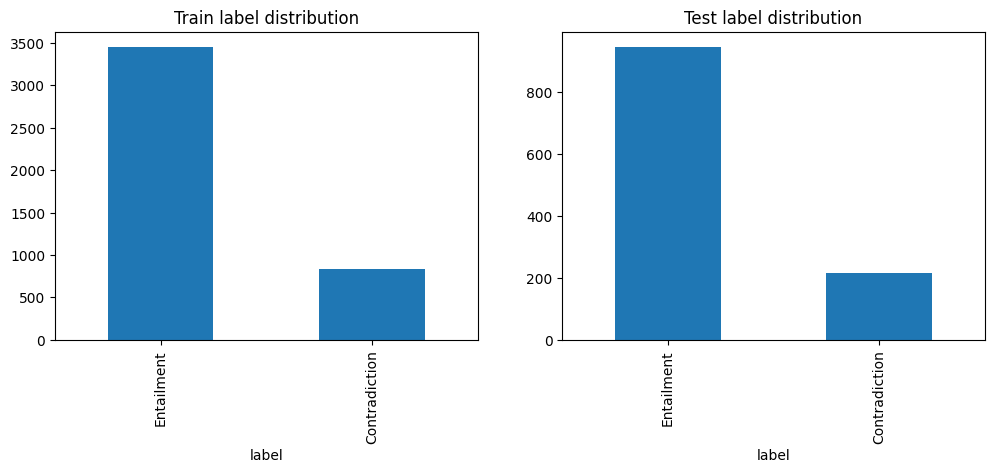         
*Fig 1: shows distribution of classes in both sets.*         
          
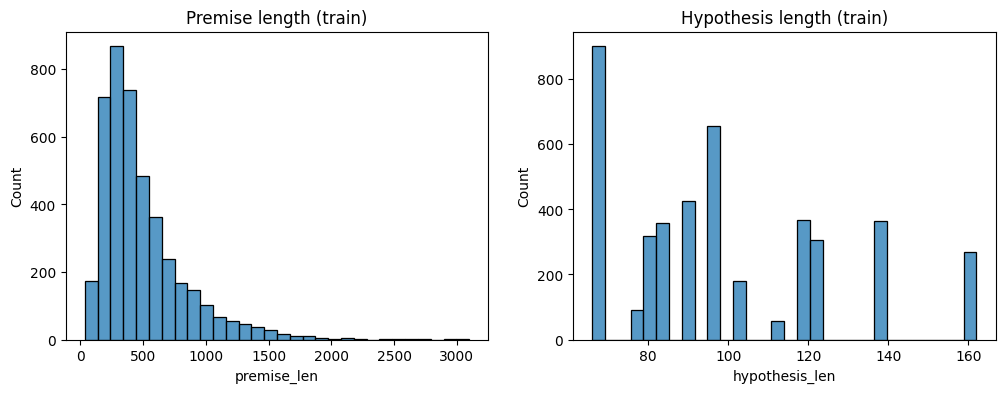          
*Fig 2: histrograms of text length in a training dataset*

## Task 2: Basic Machine Learning

In this task we used a few basic machine learnineg methods: Logistic Regression, Random Forest and Support Vector Machines (SVM). So we used our training set to fit to model, and then we evaluated model on evaluation set.              
Here we concatenated text, so we joined both processed "clean premise" and "clean hypothesis". Then we vectorized concatenated texts using TD-IDF.       
We also fine-tuned all of the methods above by applying some additional parameters beforehand to improve its accuracy. We also used cross validation.      
### Results:        
* Logistic Regression:       
Accuracy: 0.910360884749709         
      
      
|         |precision |   recall | f1-score |  support|
|----|-----|-----|-----|-----|
|Contradiction    |   0.88 |     0.63 |     0.73|       168|
|  Entailment     |  0.92  |    0.98  |    0.95 |      691|
|    accuracy      |      |            |   0.91  |     859|
|  macro avg     |  0.90  |    0.80    |  0.84   |    859|
| weighted avg      | 0.91   |   0.91     | 0.90    |   859|          
      
*Table #: classification report for logistic regression.*        
           
* Tuned Logistic Regression:         
Accuraccy: 0.9208381839348079
        
|         |precision |   recall | f1-score |  support|
|----|-----|-----|-----|-----|
|Contradiction    |   0.84 |     0.74 |     0.78|       168|
|  Entailment     |  0.94  |    0.97  |    0.95 |      691|
|    accuracy      |      |            |   0.92  |     859|
|  macro avg     |  0.89  |    0.85    |  0.87   |    859|
| weighted avg      | 0.92   |   0.92     | 0.92    |   859|          
      
*Table #: classification report for tuned logistic regression.*             
         
                 
* Random Forest:       
Accuracy: 0.9033760186263097        
      
      
|         |precision |   recall | f1-score |  support|
|----|-----|-----|-----|-----|
|Contradiction    |   0.88 |     0.58 |     0.70|       168|
|  Entailment     |  0.91  |    0.98  |    0.94 |      691|
|    accuracy      |      |            |   0.90  |     859|
|  macro avg     |  0.89  |    0.78    |  0.82   |    859|
| weighted avg      | 0.90   |   0.90     | 0.90    |   859|          
      
*Table #: classification report for random forest.*        
         
* Tuned Random Forest:       
Accuracy: 0.9208381839348079        
      
      
|         |precision |   recall | f1-score |  support|
|----|-----|-----|-----|-----|
|Contradiction    |   0.84 |     0.74 |     0.78|       168|
|  Entailment     |  0.94  |    0.97  |    0.95 |      691|
|    accuracy      |      |            |   0.92  |     859|
|  macro avg     |  0.89  |    0.85    |  0.87   |    859|
| weighted avg      | 0.92   |   0.92     | 0.92    |   859|          
      
*Table #: classification report for tuned random forest. We can see that we got result exactly the same as with tuned logistic regression*      
           
* Support Vector Machine:       
Accuracy: 0.9324796274738067        
      
      
|         |precision |   recall | f1-score |  support|
|----|-----|-----|-----|-----|
|Contradiction    |   0.85 |     0.80 |     0.82|       168|
|  Entailment     |  0.95  |    0.97  |    0.96 |      691|
|    accuracy      |      |            |   0.93  |     859|
|  macro avg     |  0.90  |    0.88    |  0.89   |    859|
| weighted avg      | 0.93   |   0.93     | 0.93    |   859|          
      
*Table #: classification report for SVM.*      
         
* Tuned Support Vector Machine:       
Accuracy: 0.9324796274738067        
      
      
|         |precision |   recall | f1-score |  support|
|----|-----|-----|-----|-----|
|Contradiction    |   0.85 |     0.80 |     0.82|       168|
|  Entailment     |  0.95  |    0.97  |    0.96 |      691|
|    accuracy      |      |            |   0.93  |     859|
|  macro avg     |  0.90  |    0.88    |  0.89   |    859|
| weighted avg      | 0.93   |   0.93     | 0.93    |   859|          
      
*Table #: classification report for tuned SVM. It is the same as SVM before tuning.*

Finally we evaluated all six models on test sets and visualize the accuracy in Fig #:



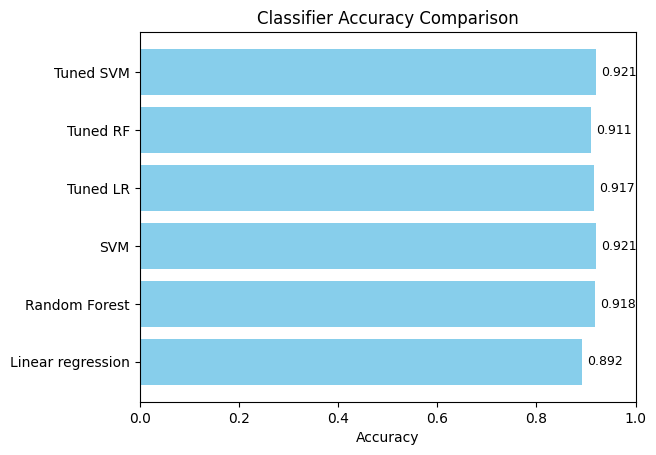                  
*Fig #: bar plot of different machine learning method and their tuned versions accuracy.*      

## Task 3: Transformer-based Classifier

In the third task we shifted to deep learning. First we had to select a suitable pre-trained model (transformer-based), we decided on BERT with model name = "distilbert-base-cased". 'Distilbert' means it's a faster model but less precise, 'cased' means it works on cased text.           
Then we had to prepare sentence-pair inputs for contradiction classification. For that purpose we had to use the original, non-processed text, and tokenize it. At this point we finally mapped label to binary values (entailment=0, contradiction=1).

## Task 4: Sentence Embedding Model for Contradiction Search

# guide to tables in markdown      

Basic table:     



| Header 1 | Header 2 | Header 3 |
|----------|----------|----------|
| Row 1 A  | Row 1 B  | Row 1 C  |
| Row 2 A  | Row 2 B  | Row 2 C  |      

*Table 1: text*      

Text aligment:     

| Left | Center | Right |
|:-----|:------:|------:|
| A    | B      | C     |
| D    | E      | F     |
     
You dont need perfectly alligned | -> markdown will take care of those       
